# BigBasket Products Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import autoreload
import os
import csv
import sys

from collections import defaultdict, Counter

%matplotlib inline

sb.set_style('darkgrid')
sb.set()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\BigBasket Products\BigBasket.csv")
df.head()

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url
0,Onion (Loose),Fresho,69.75,52.0,https://www.bigbasket.com/media/uploads/p/l/40...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/40075537/fresho-o...
1,Onion,Fresho,174.35,130.0,https://www.bigbasket.com/media/uploads/p/l/12...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201414/fresho-on...
2,Onion (Loose),Fresho,34.87,26.0,https://www.bigbasket.com/media/uploads/p/l/10...,1 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000148/fresho-o...
3,Onion,Fresho,69.74,52.0,https://www.bigbasket.com/media/uploads/p/l/12...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201413/fresho-on...
4,Onion (Loose),Fresho,174.37,129.0,https://www.bigbasket.com/media/uploads/p/l/10...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000150/fresho-o...


In [3]:
df.shape

(8208, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    8208 non-null   object 
 1   Brand          8208 non-null   object 
 2   Price          8208 non-null   float64
 3   DiscountPrice  8208 non-null   float64
 4   Image_Url      8208 non-null   object 
 5   Quantity       8208 non-null   object 
 6   Category       8208 non-null   object 
 7   SubCategory    8208 non-null   object 
 8   Absolute_Url   8208 non-null   object 
dtypes: float64(2), object(7)
memory usage: 577.2+ KB


In [9]:
df.describe().round()

,Price,DiscountPrice
count,8208.0,8208.0
mean,545.0,357.0
std,665.0,438.0
min,5.0,3.0
25%,190.0,129.0
50%,360.0,238.0
75%,650.0,429.0
max,10140.0,7605.0


In [10]:
df.isnull().sum()

ProductName      0
Brand            0
Price            0
DiscountPrice    0
Image_Url        0
Quantity         0
Category         0
SubCategory      0
Absolute_Url     0
dtype: int64

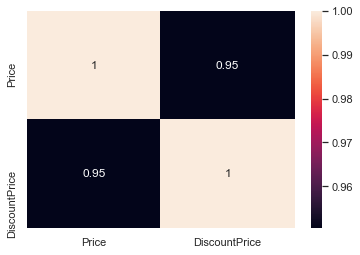

In [14]:
sb.heatmap(df.corr(), annot = True)

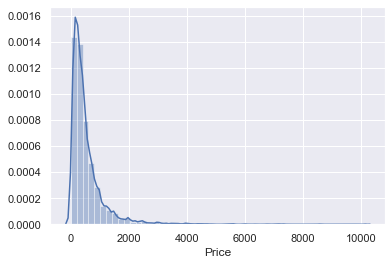

In [15]:
sb.distplot(df['Price'])

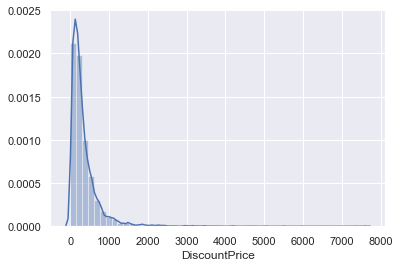

In [16]:
sb.distplot(df['DiscountPrice'])

In [19]:
df.head()

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url
0,Onion (Loose),Fresho,69.75,52.0,https://www.bigbasket.com/media/uploads/p/l/40...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/40075537/fresho-o...
1,Onion,Fresho,174.35,130.0,https://www.bigbasket.com/media/uploads/p/l/12...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201414/fresho-on...
2,Onion (Loose),Fresho,34.87,26.0,https://www.bigbasket.com/media/uploads/p/l/10...,1 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000148/fresho-o...
3,Onion,Fresho,69.74,52.0,https://www.bigbasket.com/media/uploads/p/l/12...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201413/fresho-on...
4,Onion (Loose),Fresho,174.37,129.0,https://www.bigbasket.com/media/uploads/p/l/10...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000150/fresho-o...


In [20]:
df.drop(columns = ['Image_Url', 'Absolute_Url'], inplace = True)

In [27]:
df['Category'].value_counts()

Beauty & Hygiene            3789
Kitchen, Garden & Pets      1321
Foodgrains, Oil & Masala     718
Cleaning & Household         562
Gourmet & World Food         490
Snacks & Branded Foods       408
Eggs, Meat & Fish            360
Bakery, Cakes & Dairy        169
Beverages                    147
Baby Care                    127
Fruits & Vegetables          117
Name: Category, dtype: int64

In [45]:
cat_price = df.groupby('Category')
round(cat_price['Price'].sum().sort_values(ascending = False).to_frame(), 2).style.background_gradient(cmap = 'Accent')

,Price
Category,
Beauty & Hygiene,2200268.850000
"Kitchen, Garden & Pets",977114.000000
Cleaning & Household,280164.000000
"Eggs, Meat & Fish",250490.000000
"Foodgrains, Oil & Masala",239914.000000
Gourmet & World Food,233804.000000
Baby Care,113572.000000
Snacks & Branded Foods,82652.000000
Beverages,57851.000000
